In [6]:
# pip install librosa
# pip install resampy
import numpy as np
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import librosa
from matplotlib import pyplot as plt
import librosa.display

In [ ]:
import os

# Create an empty list to store filenames
filenames = []

# Traverse the directory and collect filenames
for dirname, _, files in os.walk('16000_pcm_speeches'):
    for filename in files:
        # Append the filename to the list
        filenames.append(filename)

# Sort the list of filenames
filenames.sort()

# Create full file paths by joining the sorted filenames with the directory path
directory_path = '16000_pcm_speeches'
file_paths = [os.path.join(directory_path, filename) for filename in filenames]

# Print the sorted file paths
for file_path in file_paths:
    print(file_path)


In [9]:
from IPython.display import Audio
import librosa

audio_file = '16000_pcm_speeches/Benjamin_Netanyau/2.wav'

# Load the audio file with librosa to get the data and sample rate
audio_data, sample_rate = librosa.load(audio_file, sr=None)

# Play the audio file
Audio(data=audio_data, rate=sample_rate)


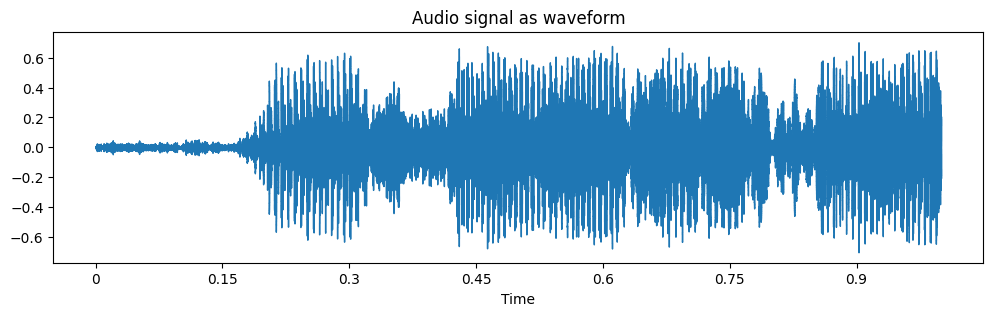

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
# Loads mp3 file with a specific sampling rate, here 16kHz
y, sr = librosa.load("16000_pcm_speeches/Benjamin_Netanyau/1.wav", sr=16_000)

# Plot the signal stored in 'y'
plt.figure(figsize=(12, 3))
plt.title("Audio signal as waveform")
librosa.display.waveshow(y, sr=sr);
plt.show()

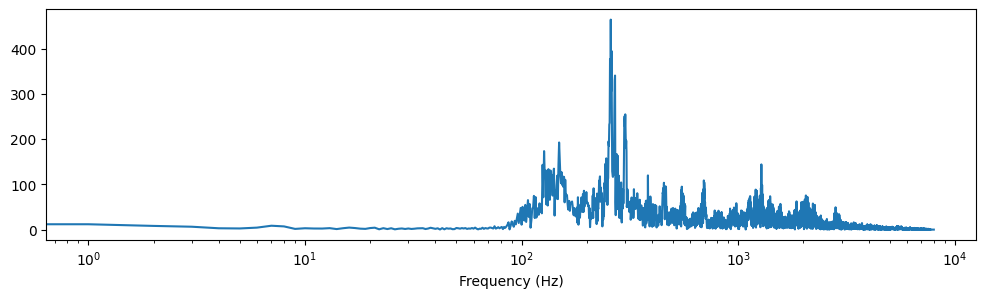

In [11]:
import scipy
import numpy as np

# Applies fast fourier transformation to the signal and takes absolute values
y_freq = np.abs(scipy.fftpack.fft(y))

# Establishes all possible frequency
# (dependent on the sampling rate and the length of the signal)
f = np.linspace(0, sr, len(y_freq))

# Plot audio signal as frequency information.
plt.figure(figsize=(12, 3))
plt.semilogx(f[: len(f) // 2], y_freq[: len(f) // 2])
plt.xlabel("Frequency (Hz)")
plt.show();

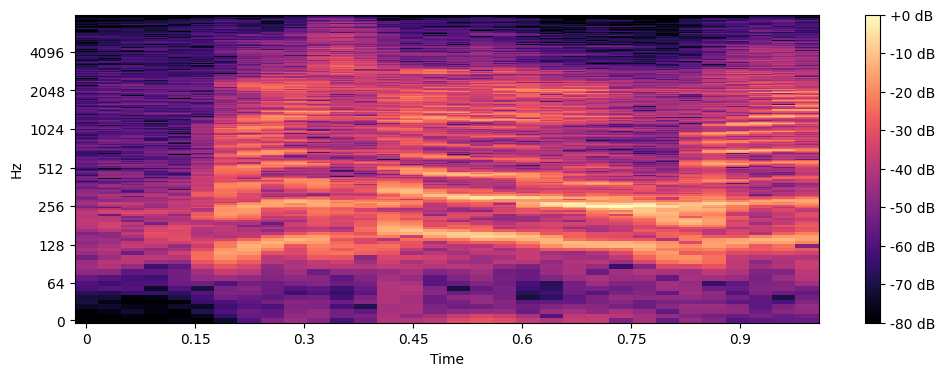

In [12]:
import librosa.display

# Compute short-time Fourier Transform
x_stft = np.abs(librosa.stft(y))

# Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)

# Plot STFT spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.show();

In [13]:
#root_dir = "Speaker-Identification"
import os 
data_dir = os.path.join("16000_pcm_speeches")
background_noise_dir = "16000_pcm_speeches//_background_noise_"
speaker_folders = ["Benjamin_Netanyau", "Jens_Stoltenberg", "Julia_Gillard", "Margaret_Tarcher", "Nelson_Mandela"]
speaker_paths = ["16000_pcm_speeches//Benjamin_Netanyau", "16000_pcm_speeches//Jens_Stoltenberg", 
                 "16000_pcm_speeches//Julia_Gillard", "16000_pcm_speeches//Magaret_Tarcher", "16000_pcm_speeches//Nelson_Mandela"]

In [14]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr=16000)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    # Display the MFCCs
    # plt.figure(figsize=(10, 4))
    # librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate)
    # plt.colorbar()
    # plt.title('MFCC')
    # plt.show()

    return np.mean(mfccs.T, axis=0)

In [15]:
features = []
labels = []

In [16]:
for i in range(len(speaker_paths)):
    for file in os.listdir(speaker_paths[i]):
        if file.endswith(".wav"):
            file_name = os.path.join(speaker_paths[i], file)
            class_label = speaker_folders[i]
            # print(file_name)
            data = extract_features(file_name)
            features.append(data)
            labels.append(class_label)

In [17]:
if not features:
    raise ValueError("No features were extracted. Check the directories and data.")

features_df = pd.DataFrame(features, columns=[f'feature_{i}' for i in range(features[0].shape[0])])
features_df['label'] = labels
#print(features_df)

In [ ]:
noise_files = [os.path.join(background_noise_dir, file) for file in os.listdir(background_noise_dir) if file.endswith('.wav')]
for i in range(len(features_df)):
    noise = np.random.choice(noise_files)
    y_noise, sr_noise = librosa.load(noise, duration=1.0)
    y, sr = librosa.load(os.path.join(data_dir, features_df['label'][i], str(i) + ".wav"), duration=1.0)
    y += y_noise
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    features_df.iloc[i, :-1] = np.mean(mfcc.T, axis=0)

In [ ]:
import random

# Initialize lists to store features and labels
features = []
labels = []

# Define the number of samples to select per class
samples_per_class = 5

# Loop through the speaker paths
for i in range(len(speaker_paths)):
    # Create a list of audio files in the current speaker folder
    audio_files = [file for file in os.listdir(speaker_paths[i]) if file.endswith(".wav")]
    
    # Shuffle the list of audio files to ensure randomness
    random.shuffle(audio_files)
    
    # Select random 5 samples from the shuffled list
    selected_samples = audio_files[:samples_per_class]
    
    # Process the selected samples for this class
    for file in selected_samples:
        file_name = os.path.join(speaker_paths[i], file)
        class_label = speaker_folders[i]
        print(file_name)
        data = extract_features(file_name)
        features.append(data)
        labels.append(class_label)


In [ ]:
import random
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt


# Function to extract MFCC features from audio data
def extract_features(audio_data, sample_rate):
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)

    # Display the MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate)
    plt.colorbar()
    plt.title('MFCC')
    plt.show()

    return np.mean(mfccs.T, axis=0)

# Define a function to sort filenames numerically
def sort_filenames_numerically(filenames):
    file_tuples = [(filename, int(os.path.splitext(filename)[0])) for filename in filenames if os.path.splitext(filename)[0].isdigit()]
    sorted_tuples = sorted(file_tuples, key=lambda x: x[1])
    sorted_filenames = [x[0] for x in sorted_tuples]
    return sorted_filenames

# Define the desired duration (in seconds) for each segment
desired_duration = 5.0

# Initialize lists to store features and labels
features = []
labels = []

# Loop through the speaker paths
for i in range(len(speaker_paths)):
    # Create a list of audio files in the current speaker folder
    audio_files = [file for file in os.listdir(speaker_paths[i]) if file.endswith(".wav")]
    
    # Sort the list of audio files numerically
    audio_files = sort_filenames_numerically(audio_files)
    
    # Initialize variables to track segment duration and merged audio
    current_duration = 0
    merged_audio = np.array([])

    # Process the selected samples for this class
    merged_files = []  # Initialize a list to keep track of merged files
    class_label = speaker_folders[i]  # Store class label
    
    for file in audio_files:
        file_name = os.path.join(speaker_paths[i], file)
        
        # Load the audio file
        audio, sample_rate = librosa.load(file_name, sr=None)
        
        # Calculate the duration of the current audio file
        file_duration = len(audio) / sample_rate
        
        # Append the current filename to the merged_files list
        merged_files.append(file)
        
        # Check if adding the current audio will exceed the desired duration
        if current_duration + file_duration > desired_duration:
            # Print the list of merged files for this segment
            print(f"Segment for class {class_label}: Merged files: {', '.join(merged_files)}")
            
            # Extract features from the merged audio
            features.append(extract_features(merged_audio, sample_rate))
            labels.append(class_label)

            current_duration = 0
            merged_audio = np.array([])
            merged_files = []  # Clear the list for the next segment

        # Append the current audio to the merged segment
        merged_audio = np.concatenate([merged_audio, audio])
        current_duration += file_duration

    # Check if there is remaining audio in the last segment
    if len(merged_audio) > 0:
        # Print the list of merged files for the last segment
        print(f"Segment for class {class_label}: Merged files: {', '.join(merged_files)}")
        
        # Extract features from the merged audio
        features.append(extract_features(merged_audio))
        labels.append(class_label)


In [ ]:
import random
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Function to extract MFCC features from audio data
def extract_features(audio_data, sample_rate):
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)

    # Display the MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate)
    plt.colorbar()
    plt.title('MFCC')
    plt.show()

    return np.mean(mfccs.T, axis=0)

# Define a function to sort filenames numerically
def sort_filenames_numerically(filenames):
    file_tuples = [(filename, int(os.path.splitext(filename)[0])) for filename in filenames if os.path.splitext(filename)[0].isdigit()]
    sorted_tuples = sorted(file_tuples, key=lambda x: x[1])
    sorted_filenames = [x[0] for x in sorted_tuples]
    return sorted_filenames

# Define the desired duration (in seconds) for each segment
desired_duration = 5.0

# Initialize lists to store features, labels, and audio paths
features = []
labels = []
audio_paths = []

# Loop through the speaker paths
for i in range(len(speaker_paths)):
    # Create a list of audio files in the current speaker folder
    audio_files = [file for file in os.listdir(speaker_paths[i]) if file.endswith(".wav")]
    
    # Sort the list of audio files numerically
    audio_files = sort_filenames_numerically(audio_files)
    
    # Initialize variables to track segment duration and merged audio
    current_duration = 0
    merged_audio = np.array([])

    # Process the selected samples for this class
    merged_files = []  # Initialize a list to keep track of merged files
    class_label = speaker_folders[i]  # Store class label
    
    for file in audio_files:
        file_name = os.path.join(speaker_paths[i], file)
        
        # Load the audio file
        audio, sample_rate = librosa.load(file_name, sr=None)
        audio_paths.append(file_name)  # Store the audio file path
        
        # Calculate the duration of the current audio file
        file_duration = len(audio) / sample_rate
        
        # Append the current filename to the merged_files list
        merged_files.append(file)
        
        # Check if adding the current audio will exceed the desired duration
        if current_duration + file_duration > desired_duration:
            # Print the list of merged files for this segment
            print(f"Segment for class {class_label}: Merged files: {', '.join(merged_files)}")
            
            # Play the merged audio
            display(Audio(data=merged_audio, rate=sample_rate))
            
            # Extract features from the merged audio
            features.append(extract_features(merged_audio, sample_rate))
            labels.append(class_label)
            
            current_duration = 0
            merged_audio = np.array([])
            merged_files = []  # Clear the list for the next segment

        # Append the current audio to the merged segment
        merged_audio = np.concatenate([merged_audio, audio])
        current_duration += file_duration

    # Check if there is remaining audio in the last segment
    if len(merged_audio) > 0:
        # Print the list of merged files for the last segment
        print(f"Segment for class {class_label}: Merged files: {', '.join(merged_files)}")
        
        # Play the merged audio
        display(Audio(data=merged_audio, rate=sample_rate))
        
        # Extract features from the merged audio
        features.append(extract_features(merged_audio, sample_rate))
        labels.append(class_label)


In [ ]:
for i in range(len(features_df)):
    noise = np.random.choice(noise_files)
    y_noise, sr_noise = librosa.load(noise, duration=1.0)
    try:
        audio_file_path = os.path.join(data_dir, features_df['label'][i], str(i) + ".wav")
        y, sr = librosa.load(audio_file_path, duration=1.0)
        y += y_noise
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        features_df.iloc[i, :-1] = np.mean(mfcc.T, axis=0)
    except Exception as e:
        print(f"Error processing file {audio_file_path}: {e}")